# Custom Dataset Implementation

### Import Required Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#### a) Choose a Dataset

In [4]:
import pandas as pd
df = pd.read_csv('house_prices.csv')
print(df.head())
print(df.describe())
print(df.info())

           ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        600         160      2003.0     18300  Cockburn Central Station   
1        351         139      2013.0     26900           Kwinana Station   
2        719          86      1979.0     22600           Challis Station   
3        651          59      1953.0     17900           Midland Station   
4        466         131      1998.0     11200        Bassendean Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              1800  09-2018\r      6164 -32.1159

#### b) Clean and Preprocess Initial Columns

In [5]:
# Strip whitespace and carriage returns from DATE_SOLD
df['DATE_SOLD'] = df['DATE_SOLD'].str.strip()

# Drop rows with missing target value
df = df.dropna(subset=['PRICE'])

# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

#### c) Split Features and Target Variable

In [7]:
# Features (X) and target (y)
X = df.drop(columns='PRICE')
y = df['PRICE']


#### d) Define Numerical and Categorical Features

In [9]:
numerical_features = ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 
                      'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE',
                      'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK']

categorical_features = ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH', 'DATE_SOLD']


#### e) Create Preprocessing Pipelines

In [10]:
# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


#### f) Split Data into Training and Test Sets


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


#### g) Train Multiple Models and Compare RMSE

In [13]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'{name} RMSE: {rmse:.2f}')


Linear Regression RMSE: 177625.38
Ridge RMSE: 177257.05


c:\Users\92343\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308996556024939.1, tolerance: 337817695383.31683
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso RMSE: 178448.60
Random Forest RMSE: 170217.09


#### h) Visualize RMSE Results

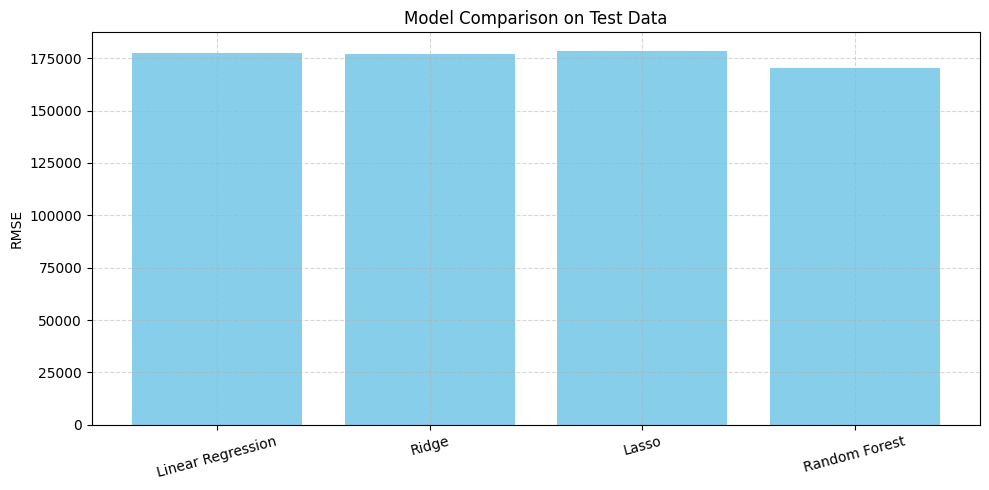

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Comparison on Test Data')
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
